# Neccessary imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Read and explore the dataset

View the datatset

In [ ]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df = df.drop(columns=["patientid"]) #patient ID is irrelevant
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


Check for excessive number of duplicates

In [ ]:
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicate_rows)

Number of duplicate rows: 0


Check the size, data types and if there are any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


Check if the dataset is balanced

In [ ]:
df["target"].value_counts()

1    580
0    420
Name: target, dtype: int64

Analyse the impact of the categorical variables on the final result

<Axes: xlabel='noofmajorvessels'>

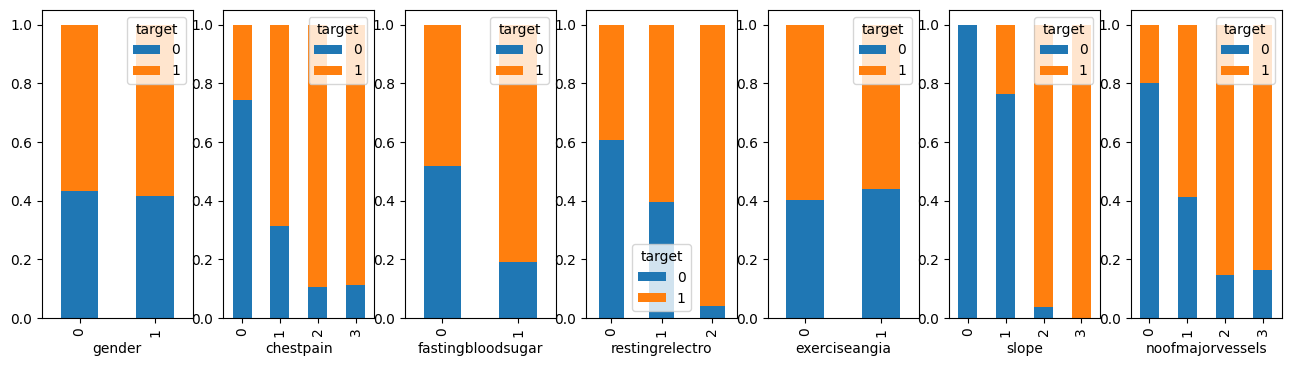

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16, 4))

#get the data
gender=pd.crosstab(df['gender'],df['target'])
cp=pd.crosstab(df['chestpain'],df['target'])
fbs=pd.crosstab(df['fastingbloodsugar'],df['target'])
restecg=pd.crosstab(df['restingrelectro'],df['target'])
exang=pd.crosstab(df['exerciseangia'],df['target'])
slope=pd.crosstab(df['slope'],df['target'])
major_vessels=pd.crosstab(df['noofmajorvessels'],df['target'])

#normalise each bin
gender=gender.div(gender.sum(1).astype(float), axis=0)
cp=cp.div(cp.sum(1).astype(float), axis=0)
fbs=fbs.div(fbs.sum(1).astype(float), axis=0)
restecg=restecg.div(restecg.sum(1).astype(float), axis=0)
exang=exang.div(exang.sum(1).astype(float),axis=0)
slope=slope.div(slope.sum(1).astype(float), axis=0)
major_vessels=major_vessels.div(major_vessels.sum(1).astype(float), axis=0)

#plot
gender.plot(kind="bar",stacked=True, ax=axes[0])
cp.plot(kind="bar",stacked=True, ax=axes[1])
fbs.plot(kind="bar",stacked=True, ax=axes[2])
restecg.plot(kind="bar",stacked=True, ax=axes[3])
exang.plot(kind="bar",stacked=True, ax=axes[4])
slope.plot(kind="bar",stacked=True, ax=axes[5])
major_vessels.plot(kind="bar",stacked=True, ax=axes[6])

Analyse the impact of the continuous variables on the final result

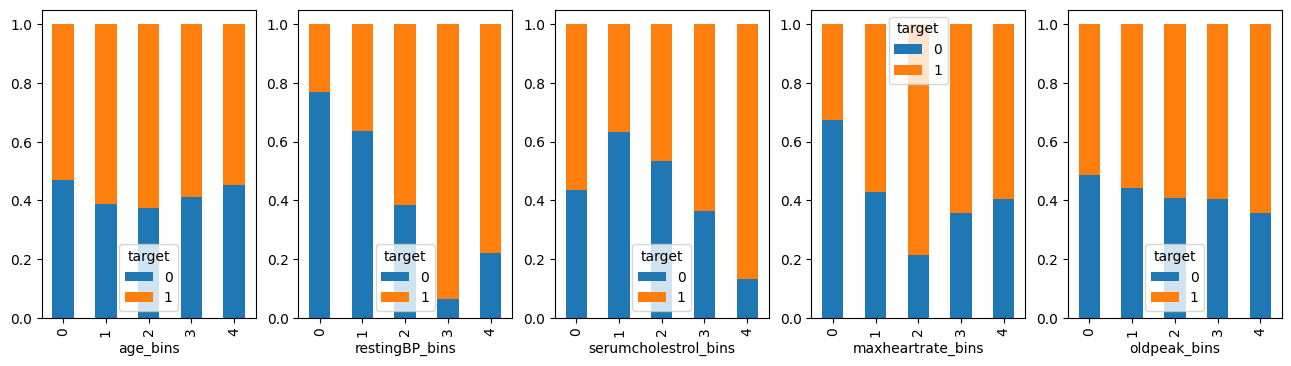

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

#divide into 5 more-less equal-sized bins
df['age_bins'] = pd.qcut(df['age'], q=5, labels=False, duplicates='drop')
df['restingBP_bins'] = pd.qcut(df['restingBP'], q=5, labels=False, duplicates='drop')
df['serumcholestrol_bins'] = pd.qcut(df['serumcholestrol'], q=5, labels=False, duplicates='drop')
df['maxheartrate_bins'] = pd.qcut(df['maxheartrate'], q=5, labels=False, duplicates='drop')
df['oldpeak_bins'] = pd.qcut(df['oldpeak'], q=5, labels=False, duplicates='drop')

#get the data
age=pd.crosstab(df['age_bins'],df['target'])
restingBP=pd.crosstab(df['restingBP_bins'],df['target'])
serumcholestrol=pd.crosstab(df['serumcholestrol_bins'],df['target'])
maxheartrate=pd.crosstab(df['maxheartrate_bins'],df['target'])
oldpeak=pd.crosstab(df['oldpeak_bins'],df['target'])

#normalise each bin
age=age.div(age.sum(1).astype(float), axis=0)
restingBP=restingBP.div(restingBP.sum(1).astype(float), axis=0)
serumcholestrol=serumcholestrol.div(serumcholestrol.sum(1).astype(float), axis=0)
maxheartrate=maxheartrate.div(maxheartrate.sum(1).astype(float), axis=0)
oldpeak=oldpeak.div(oldpeak.sum(1).astype(float),axis=0)

#plot
age.plot(kind="bar",stacked=True, ax=axes[0])
restingBP.plot(kind="bar",stacked=True, ax=axes[1])
serumcholestrol.plot(kind="bar",stacked=True, ax=axes[2])
maxheartrate.plot(kind="bar",stacked=True, ax=axes[3])
oldpeak.plot(kind="bar",stacked=True, ax=axes[4])

#get rid of the now useless bin columns
columns_to_remove = ['age_bins', 'restingBP_bins',"serumcholestrol_bins", 'maxheartrate_bins', 'oldpeak_bins']
df = df.drop(columns=columns_to_remove)

Investigate the distributions of continuous variabless

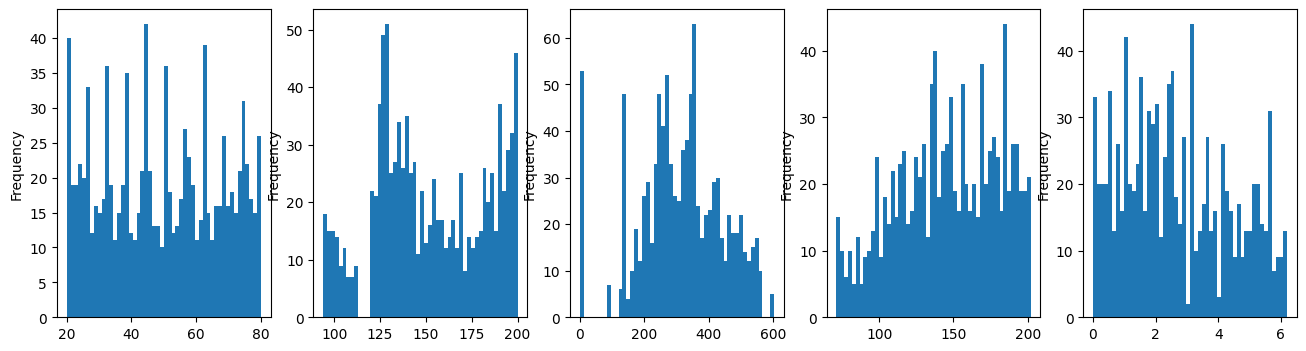

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

df['age'].plot(kind='hist', bins=50, ax=axes[0], xlabel="age", stacked=True)
df['restingBP'].plot(kind='hist', bins=50, ax=axes[1], xlabel="restingBP", stacked=True)
df['serumcholestrol'].plot(kind='hist', bins=50, ax=axes[2], xlabel="serumcholestrol", stacked=True)
df['maxheartrate'].plot(kind='hist', bins=50, ax=axes[3], xlabel="maxheartrate", stacked=True)
df['oldpeak'].plot(kind='hist', bins=50, ax=axes[4], xlabel="oldpeak", stacked=True)
plt.show()

#Feature Selection

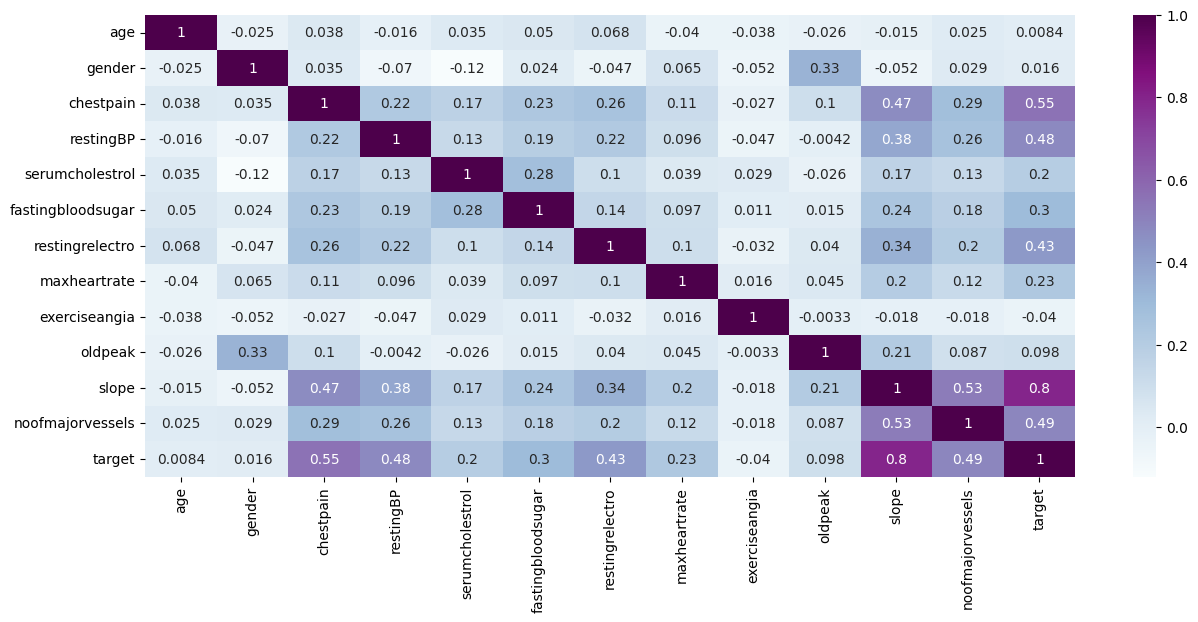

In [ ]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True, cmap="BuPu")
plt.show()

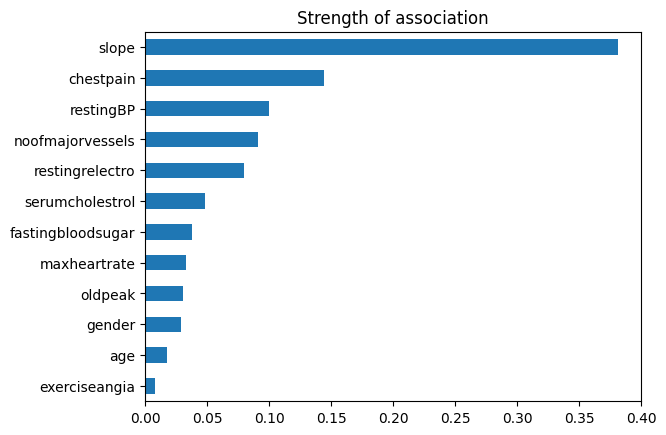

In [ ]:
X = df.drop(['target'],axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['target']
xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()
muinfo = mutual_info_classif(X,y)
muinfo_sorted = pd.Series(data=muinfo, index=X.columns).sort_values()
xtrees_sorted.plot(kind='barh', title='Strength of association')
plt.show()

In [ ]:
columns_to_drop = ["gender", "age"]
X = X.drop(columns=columns_to_drop)

# Dimensionality reduction - alternative to feature selection (not used)

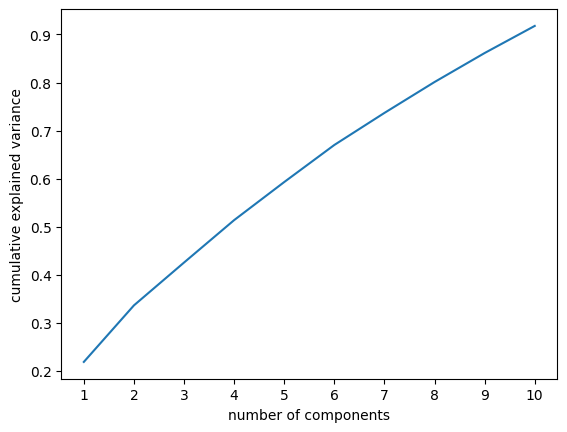

In [ ]:
X = df.drop(['target'],axis=1)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['target']
pca = PCA(n_components=10).fit(X)
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,11))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

# Prediciton Training

In [ ]:
def train_and_evaluate(model, X, y):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    # Fit model using all of the reserved training data ... look at training accuracy
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))

    # Use predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))

    # Draw out a confusion matrix

    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(cm)
    plt.figure(figsize=(3, 3))
    ax = sns.heatmap(cm,annot=True, xticklabels=['N', 'Y'], fmt='.0f', cbar=False, yticklabels=['N', 'Y'], square=True,linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Predicted target')
    ax.set_ylabel('Actual target')
    plt.show()

    return learnt_model

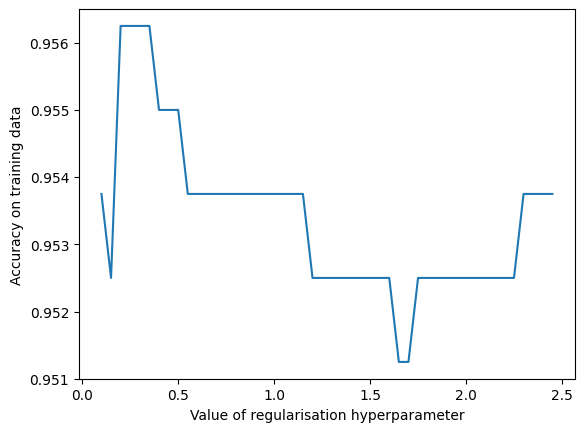

In [ ]:
def train_model(algorithm, hyperparams, X, y):
    """
        Use cross-validation to determine model accuracy for a
        specified algorithm, hyperparameters, features and target
        variables.

        :param Scikit-Learn class algorithm: name of constructor for algorithm
        :param dict hyperparameters: hyperparameters passed to constructor- keys must
                                     be parameters allowed for constructor
        :param array-like X: values of feature variables
        :param vector-like y: values of target variables

        :returns tuple: mean accuracy across all CV folds, and trained model
    """
    # Instantiate the specified model using the specified hyperparameter values

    model = algorithm(**hyperparams)

    # Perform cross-validation over the data to get a good view of accuracy

    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

    # Fit model to supplied data

    learnt_model = model.fit(X, y)

    # return mean accuracy over all CV folds

    return (np.mean(scores), learnt_model)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a range of regularisation strengths 0.1, 0.15 ... 1.2

reg_values = [0.05 * i for i in range(2, 50)]
reg_accuracy = []
for reg_strength in reg_values:
    acc, _ = train_model(LogisticRegression, {'C': reg_strength}, X_train, y_train)
    reg_accuracy.append(acc)

# Plot the results

plt.plot(reg_values, reg_accuracy) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Accuracy on training data')
plt.xlabel('Value of regularisation hyperparameter');
plt.show()

Test data metrics: accuracy=0.960, f1=0.966, precision=0.966, recall=0.966


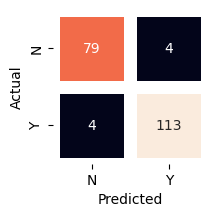

In [ ]:
train_accuracy, best_model = train_model(LogisticRegression, {'C': 0.3}, X_train, y_train)

y_pred = best_model.predict(X_test)
print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
      .format(accuracy_score(y_true=y_test, y_pred=y_pred),
              f1_score(y_true=y_test, y_pred=y_pred),
              precision_score(y_true=y_test, y_pred=y_pred),
              recall_score(y_true=y_test, y_pred=y_pred)))

# Draw out a confusion matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(2, 2))
ax = sns.heatmap(cm,annot=True, xticklabels=['N', 'Y'], cbar=False, fmt='.0f',
                 yticklabels=['N', 'Y'], square=True,
                 linewidths=8.0) # plots the confusion matrix
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

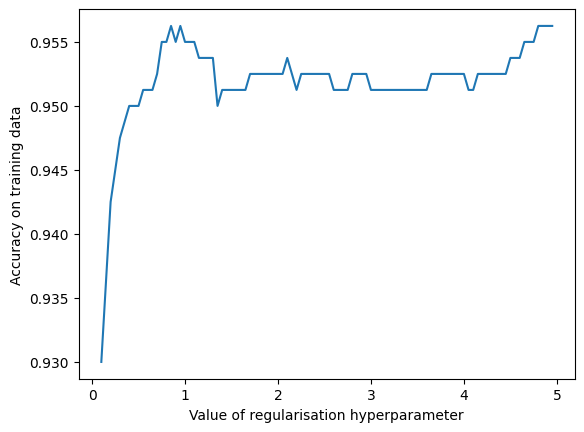

In [ ]:
def train_model(algorithm, hyperparams, X, y):
    """
        Use cross-validation to determine model accuracy for a
        specified algorithm, hyperparameters, features and target
        variables.

        :param Scikit-Learn class algorithm: name of constructor for algorithm
        :param dict hyperparameters: hyperparameters passed to constructor- keys must
                                     be parameters allowed for constructor
        :param array-like X: values of feature variables
        :param vector-like y: values of target variables

        :returns tuple: mean accuracy across all CV folds, and trained model
    """
    # Instantiate the specified model using the specified hyperparameter values

    model = algorithm(**hyperparams)

    # Perform cross-validation over the data to get a good view of accuracy

    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

    # Fit model to supplied data

    learnt_model = model.fit(X, y)

    # return mean accuracy over all CV folds

    return (np.mean(scores), learnt_model)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a range of regularisation strengths 0.1, 0.15 ... 1.2

reg_values = [0.05 * i for i in range(2, 100)]
reg_accuracy = []
for reg_strength in reg_values:
    acc, _ = train_model(SVC, {'C': reg_strength}, X_train, y_train)
    reg_accuracy.append(acc)

# Plot the results

plt.plot(reg_values, reg_accuracy) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Accuracy on training data')
plt.xlabel('Value of regularisation hyperparameter');
plt.show()

Test data metrics: accuracy=0.975, f1=0.979, precision=0.967, recall=0.991


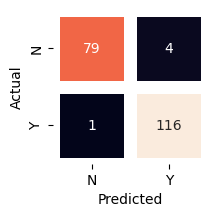

In [ ]:
train_accuracy, best_model = train_model(SVC, {'C': 0.9}, X_train, y_train)

y_pred = best_model.predict(X_test)
print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
      .format(accuracy_score(y_true=y_test, y_pred=y_pred),
              f1_score(y_true=y_test, y_pred=y_pred),
              precision_score(y_true=y_test, y_pred=y_pred),
              recall_score(y_true=y_test, y_pred=y_pred)))

# Draw out a confusion matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(figsize=(2, 2))
ax = sns.heatmap(cm,annot=True, xticklabels=['N', 'Y'], cbar=False, fmt='.0f',
                 yticklabels=['N', 'Y'], square=True,
                 linewidths=8.0) # plots the confusion matrix
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()